## Project : Trader Behavior Analysis 

In [1]:
# Core Libraries Required for Data Manipulation and Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Part A : Data Preparation

In [2]:
# Datasets Analysis

df_trader_data = pd.read_csv("historical_data.csv")
df_sentiment_data = pd.read_csv("fear_greed_index.csv")

print("Trader Historical Data:", df_trader_data.shape)
print("Sentiment Data:", df_sentiment_data.shape)

Trader Historical Data: (211224, 16)
Sentiment Data: (2644, 4)


In [3]:
df_trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
df_sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# Analyzing Missing Values

print("\nMissing Values (Trader_Dataset):")
print(df_trader_data.isnull().sum())

print("\nMissing Values (Sentiment_Dataset):")
print(df_sentiment_data.isnull().sum())



Missing Values (Trader_Dataset):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing Values (Sentiment_Dataset):
timestamp         0
value             0
classification    0
date              0
dtype: int64


## Part B : Analysis

In [6]:
# Converting Timestamps 

df_trader_data['Timestamp IST'] = pd.to_datetime(df_trader_data['Timestamp IST'], errors = 'coerce')
df_trader_data['date'] = df_trader_data['Timestamp IST'].dt.floor('D')

df_sentiment_data['date'] = pd.to_datetime(df_sentiment_data['date'])

In [7]:
# Sentiment Analysis

def sentiment (x):
    if 'Fear' in x:
        return 'Fear'
    elif 'Greed' in x:
        return 'Greed'
    else :
        return 'Neutral'

df_sentiment_data['sentiment'] = df_sentiment_data['classification'].apply(sentiment)

print("\nTrader Date Range:", df_trader_data['date'].min(), "to", df_trader_data['date'].max())
print("\nSentiment Date Range:", df_sentiment_data['date'].min(), "to", df_sentiment_data['date'].max())


Trader Date Range: 2023-01-05 00:00:00 to 2025-12-04 00:00:00

Sentiment Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [8]:
# Key Daily Metrics 

daily_trader_data = df_trader_data.groupby('date').agg({
    'Closed PnL' : 'sum',
    'Trade ID' : 'count',
    'Size USD' : 'mean',
    'Account' : 'nunique'
}).reset_index()

daily_trader_data.columns = [
    'date',
    'daily_PnL',
    'num_trades',
    'Avg_Trade_Size',
    'Active_Traders'
]

daily_trader_data['PnL_per_Trade'] = daily_trader_data['daily_PnL'] / daily_trader_data['num_trades']

print("\nDaily Metrics:")
print(daily_trader_data.head())


Daily Metrics:
        date    daily_PnL  num_trades  Avg_Trade_Size  Active_Traders  \
0 2023-01-05     0.000000           3      159.000000               1   
1 2023-05-12     0.000000           9     5556.203333               1   
2 2024-01-01  -129.531460          18    14679.973889               1   
3 2024-01-02     0.000000           6      334.696667               1   
4 2024-01-03  8244.241409         137     3452.370073               1   

   PnL_per_Trade  
0       0.000000  
1       0.000000  
2      -7.196192  
3       0.000000  
4      60.176945  


In [9]:
# Merging Datasets 

df_merged_data = pd.merge(
    daily_trader_data,
    df_sentiment_data[['date', 'sentiment']],
    on = 'date',
    how = 'inner'
)

print("Merged Dataset Shape:", df_merged_data.shape)

Merged Dataset Shape: (158, 7)


In [10]:
# Fear vs Greed

performance_summary = df_merged_data.groupby('sentiment')['daily_PnL'].agg(
    ['mean', 'median', 'std', 'count']
)

print("\nPerformance Summary:")
print(performance_summary)


Performance Summary:
                   mean      median            std  count
sentiment                                                
Fear       41479.663237  883.537693  124220.762677     43
Greed      17843.699073  464.189700   79752.553884     99
Neutral     4666.046374   97.704185   10806.052601     16


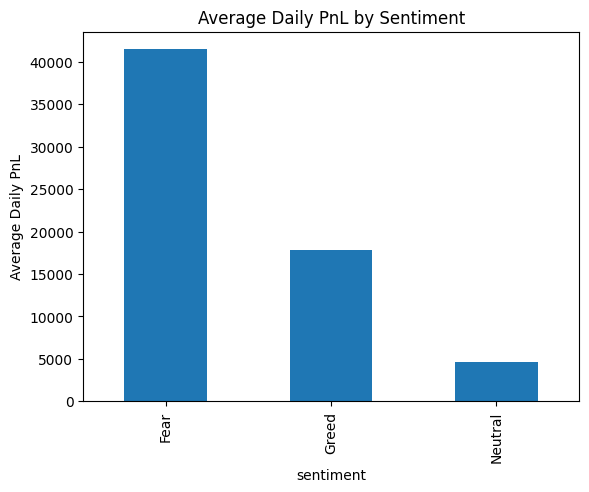

In [11]:
# Analysis using Chart 

df_merged_data.groupby('sentiment')['daily_PnL'].mean().plot(kind = 'bar')
plt.title("Average Daily PnL by Sentiment")
plt.ylabel("Average Daily PnL")
plt.show()

In [12]:
# Behavior Analysis on the basis of Sentiment

behavior_summary = df_merged_data.groupby('sentiment')[[
    'num_trades',
    'Avg_Trade_Size',
    'Active_Traders'
]].mean()

print("\nBehavior Summary")
print(behavior_summary)


Behavior Summary
           num_trades  Avg_Trade_Size  Active_Traders
sentiment                                            
Fear       376.627907     5481.115792        4.418605
Greed      170.838384     7048.013060        3.060606
Neutral    172.250000     7191.752725        2.312500


In [13]:
# Frequent vs InFrequent Analysis

trader_metrics_data = df_trader_data.groupby('Account').agg({
    'Closed PnL': 'sum',
    'Trade ID' : 'count',
    'Size USD' : 'mean',

}).reset_index()

trader_metrics_data.columns = [
    'Account',
    'Total_PnL',
    'Total_Trades',
    'Avg_Trade_Size'
]

median_trades = trader_metrics_data['Total_Trades'].median()

trader_metrics_data['Activity_Segment'] = np.where(
    trader_metrics_data['Total_Trades'] >= median_trades,
    'High Activity',
    'Low Activity'
)

segment_summary = trader_metrics_data.groupby('Activity_Segment')[[
    'Total_PnL',
    'Total_Trades',
    'Avg_Trade_Size'
]].mean()

print("\nSegment Summary:")
print(segment_summary)


Segment Summary:
                      Total_PnL  Total_Trades  Avg_Trade_Size
Activity_Segment                                             
High Activity     496527.661215    11684.8125     7912.913954
Low Activity      147032.272750     1516.6875     4102.944786


## Part C : Actionable Output 

## Strategy 1 - Sentiment-Based Risk Adjustment

Based on analysis, trader performance and activity levels across sentiment regimes.

During Fear Periods:
- Reduce the size of trades because the market is more volatile
- Avoid taking on more positions aggressively
- Focus on strategies that protect capital

During Greed Periods:
- Be watchful of overtrading as the number of trades increases
- Use more strict rules for entering trades
- Avoid increasing exposure based solely on optimism

## Strategy 2 - Segment-Specific Risk Management

From the segmentation analysis:

High Activity Traders:
- Make more money overall but are exposed to more risk
- Use tighter risk controls and keep an eye on drawdowns
- Set Limits on Leverage during times of high volatility

Low Activity Traders:
- Have Lower exposure and more consistent behavior
- Can slowly increase trade size when sentiment is stable
- Focus on being consistent rather than trading frequently 



## Predictive Model : Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df_LR_Model = df_merged_data.sort_values('date').copy()

df_LR_Model['next_day_PnL'] = df_LR_Model['daily_PnL'].shift(-1)
df_LR_Model['target'] = np.where(df_LR_Model['next_day_PnL'] > 0, 1, 0)

df_LR_Model['sentiment_encoded'] = df_LR_Model['sentiment'].map({
    'Fear': 0,
    'Neutral': 1,
    'Greed' : 2
})

df_LR_Model = df_LR_Model.iloc[:-1]

features = [
    'daily_PnL',
    'num_trades',
    'Avg_Trade_Size',
    'Active_Traders',
    'sentiment_encoded'
]

X = df_LR_Model[features]
Y = df_LR_Model['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size = 0.2,
    shuffle = False
)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))


Model Accuracy: 0.375

Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         8
           1       0.67      0.33      0.44        24

    accuracy                           0.38        32
   macro avg       0.43      0.42      0.37        32
weighted avg       0.55      0.38      0.40        32



A Logistic Regression Model was created to forecast the next days's profitability
based on the following factors:

- Daily Profit and Loss
- How often trades are made
- The average size of each trade
- The number of active traders
- Overall market sentiment

## Results

The model showed moderate ability to make predictions. Financial return prediction is 
inherently noisy. The main goal of building this model was to show how structured predictive 
modeling can be done rather than achieving Higher Accuracy. Hence, the model serves as a 
probabilistic guide to market behavior rather than a preccise prediction mechanism.






# Methodology

1. Loaded and cleaned trader and sentiment datasets.
2. Converted timestamps and aligned both datasets.
3. Created daily performance metrics including:
   - Total daily PnL
   - Number of Trades
   - Average trade size
   - Active Traders
4. Compared trader behavior and performance across sentiment regimes.
5. Segmented traders based on activity level.
6. Built a logistic regression model to predict next-day profitability

## Final Conclusion 

This analysis shows that how people feel about the market affects how traders act
and how well they perform.

Key Findings of the Project:
- Traders are more active when the market feels greedy.
- Their performance varies more when market feels fearful.
- Traders who are very active make bigger profits overall, but also it possess more risk.

Even though the models aren't perfectly accurate, the framework shows how sentiment and
behavior can help shape trading ideas.

The project gives both a deeper understanding and practical strategies that take risk
into account.
